In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

INPUT_DIR = Path("../data/daigt-proper-train-dataset")

In [2]:
df1 = pd.read_csv(INPUT_DIR / "train_drcat_01.csv")
df2 = pd.read_csv(INPUT_DIR / "train_drcat_02.csv")
df3 = pd.read_csv(INPUT_DIR / "train_drcat_03.csv")
df4 = pd.read_csv(INPUT_DIR / "train_drcat_04.csv")

In [3]:
df1.head(3)

,text,label,source,fold
0,There are alot reasons to keep our the despise...,0,persuade_corpus,2
1,Driving smart cars that drive by themself has ...,0,persuade_corpus,4
2,"Dear Principal,\n\nI believe that students at ...",0,persuade_corpus,0


In [4]:
df2.head(3)

,essay_id,text,label,source,prompt,fold
0,E0B86027C5C5,"Okay, here is my essay:\n\nWorking or doing th...",1,llama2_chat,Task: \n\n1. Research the benefits of working ...,1
1,8B9EEF86DD66,"Dear Principal,\r\n\r\nI just want to let you ...",0,original_moth,Task: Research the effects of implementing a p...,2
2,116FB053BEC7,I believe they should change the voting to pop...,0,persuade_corpus,NaN,9


In [5]:
df3.head(3)

,essay_id,text,label,source,prompt,fold
0,6BB4BEB51A80,People can learn without making mistakes. Peop...,0,original_moth,Task: \n\nWrite an essay examining the ways in...,1
1,30A8FB981469,PHONES AND DRIVING\n\nIn this world in which w...,0,persuade_corpus,NaN,2
2,B403A4E28BCE,"Okay, here's my essay:\n\nMaking Your Own Deci...",1,llama2_chat,Task: Write an essay exploring why teenagers s...,8


In [6]:
df4.head(3)

,essay_id,text,label,source,prompt,fold
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5


In [7]:
df1["label"].value_counts()

label
0    25996
1     7263
Name: count, dtype: int64

In [8]:
df2["label"].value_counts()

label
0    29792
1     9993
Name: count, dtype: int64

In [9]:
df3["label"].value_counts()

label
0    29792
1    12414
Name: count, dtype: int64

In [10]:
df4["label"].value_counts()

label
0    29792
1    14414
Name: count, dtype: int64

In [11]:
def cleaning(dataset):
    
    dataset['text'] = dataset['text'].str.strip()
    dataset["text"] = dataset["text"].replace('\\n',' ')
    dataset["text"] = dataset["text"].str.split('ubject: ').str[-1].str.strip()
    dataset["text"] = dataset["text"].str.split('Zip').str[-1].str.strip()
    dataset["text"] = dataset["text"].str.split('ZIP').str[-1].str.strip()
    
    dataset = dataset[["text", "label", "fold"]]
    
    return dataset

df1 = cleaning(df1)
df2 = cleaning(df2)
df3 = cleaning(df3)
df4 = cleaning(df4)

all_train = pd.concat([df1, df2, df3, df4])

In [12]:
all_train["label"].value_counts()

label
0    115372
1     44084
Name: count, dtype: int64

In [13]:
from spellchecker import SpellChecker

def count_typographical_errors(text):
    spell = SpellChecker()

    # Splitting the text into words
    words = text.split()

    # Finding misspelled words
    misspelled = spell.unknown(words)

    return len(misspelled)

In [14]:
from tqdm import tqdm

cache_typos = []

for text in tqdm(all_train["text"]):
    cache_typos.append(count_typographical_errors(text))

all_train["num_typo"] = cache_typos

100%|██████████| 159456/159456 [4:18:55<00:00, 10.26it/s]  


In [21]:
all_train.to_csv(INPUT_DIR / "all_train.csv", index=False)

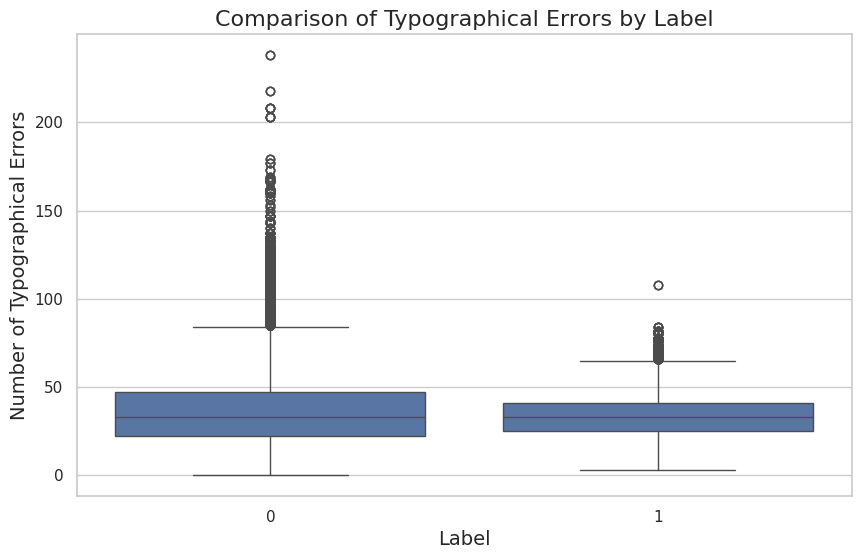

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_typo_boxplot(df, typo_col, label_col):
    # Setting the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Creating the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=label_col, y=typo_col, data=df)

    # Adding titles and labels
    plt.title('Comparison of Typographical Errors by Label', fontsize=16)
    plt.xlabel('Label', fontsize=14)
    plt.ylabel('Number of Typographical Errors', fontsize=14)

    # Display the plot
    plt.show()
    
plot_typo_boxplot(all_train, 'num_typo', 'label')

In [17]:
all_train["fold"].value_counts()

fold
2    19273
0    19273
3    19273
1    19273
4    19272
5    12620
9    12618
6    12618
7    12618
8    12618
Name: count, dtype: int64

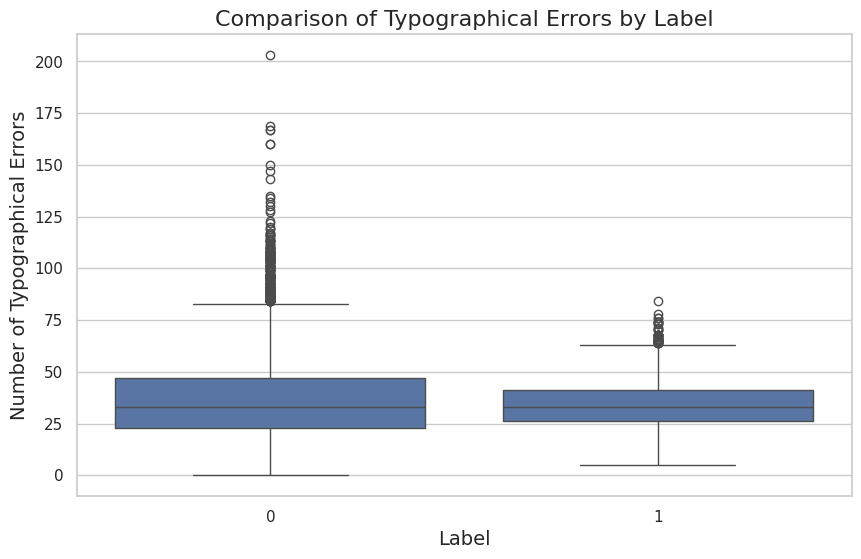

label
0    8936
1    3682
Name: count, dtype: int64


In [29]:
fold = all_train[all_train["fold"] == 8]
plot_typo_boxplot(fold, 'num_typo', 'label')
print(fold["label"].value_counts())

In [30]:
len(all_train) // 16

9966

In [31]:
all_train["label"].values

array([0, 0, 0, ..., 1, 0, 0])